# Importing libraries

In [1]:
# Sequential API to create models
from keras.models import Sequential

# Components to create a model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

# Stochastic Gradient Desent Algorithm
from keras.optimizers import SGD

# Keras already hosted MNIST dataset for us
from keras.datasets import mnist

# An Keras utility to binarize integers
from keras.utils import to_categorical

# An Keras utility to visualize model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of it's utilities
from skimage.io import imshow

# Another python library for plotting things
import matplotlib.pyplot as plt

# Another python library to manipulate vectors, matrices, arrays etc.
import numpy as np

In [2]:
# Whole dataset splits into batches
batch_size = 128

# Number of labels of our dataset
nb_classes = 10

# Number of times we want to train the model
nb_epoch = 10

In [3]:
# Load MNIST dataset
# Data split into two sub-set: Training and Test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of Training Samples: ", len(X_train))
print("Number of Associated Labels: ", len(y_train))

print("Shape of Training Data: ", X_train.shape)

print("Data Type of Training Samples: ", X_train.dtype)

print("Number of Test Samples: ", len(X_test))
print("Number of Associated Labels: ", len(y_test))

print("Shape of Training Labels: ", y_train.shape)
print("Shape of Test Data: ", X_test.shape)
print("Data Type of Test Samples: ", X_test.dtype)

print("Shape of Test Labels: ", y_test.shape)

Number of Training Samples:  60000
Number of Associated Labels:  60000
Shape of Training Data:  (60000, 28, 28)
Data Type of Training Samples:  uint8
Number of Test Samples:  10000
Number of Associated Labels:  10000
Shape of Training Labels:  (60000,)
Shape of Test Data:  (10000, 28, 28)
Data Type of Test Samples:  uint8
Shape of Test Labels:  (10000,)


# Visualize data

In [5]:
# A single sample among 60,000 samples
X_train[0].shape

(28, 28)

In [6]:
a_random_sample = X_train[0]

# Pixel values of the sample
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

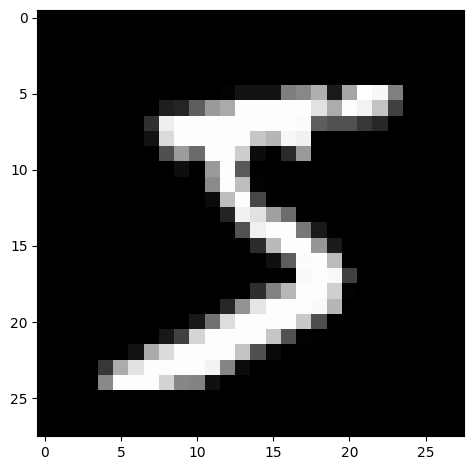

In [7]:
# Get a random sample
random_image = X_train[0]

# Display it
imshow(random_image)

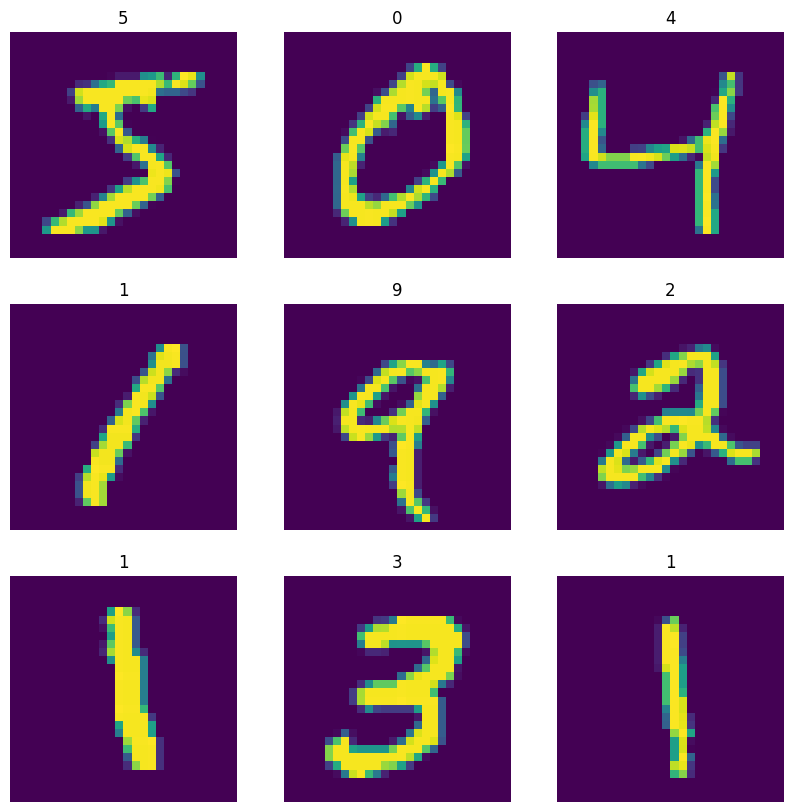

In [8]:
# Define the size of the figure
plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)

  # Get a sample at index i
  an_image = X_train[i]

  # Display the sample
  plt.imshow(an_image)

  # Display the label of the sample as title
  plt.title(int(y_train[i]))

  plt.axis("off")

# Changing Datatype of Train and Test samples

In [9]:
print("Previous DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

# Change data type of train and test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("New DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

Previous DataType of Train and Test samples:
uint8
uint8
New DataType of Train and Test samples:
float32
float32


# Rescaling data

In [10]:
# Get a random sample
a_sample = X_train[0]

print("Min value of sample: ", a_sample.min())
print("Max value of sample: ", a_sample.max())

# Devide each value in Train and Test data by 255
X_train /- 255
X_test /= 255

# Get a sample
a_sample = X_train[0]

print("Min value of sample: ", a_sample.min())
print("Max value of sample: ", a_sample.max())

Min value of sample:  0.0
Max value of sample:  255.0
Min value of sample:  0.0
Max value of sample:  255.0


# Reshape Train and Test data to 4D

In [11]:
# Make sure images have shape (28, 28, 1)

# We want to expand a dim at the end
X_train = np.expand_dims(X_train, -1)

# We want to expand a dim at the end
X_test = np.expand_dims(X_test, -1)

# Get new shape of Train and Test
print("x_train shape:", X_train.shape)

print("x_test shape:", X_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


# Binarize labels

In [12]:
# Display the training lables
y_train

# Shape of training label
y_train.shape

# A random array
input_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(input_array)
print("Input array shape: ", input_array.shape)

# Apply to_categorical to the random array
output = to_categorical(input_array, num_classes=10)

print(output)
print("Input list shape: ", input_array.shape)

[0 1 2 3 4 5 6 7 8 9]
Input array shape:  (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Input list shape:  (10,)


In [13]:
# Apply to_categorical to train labels
Y_train = to_categorical(y_train, nb_classes)

# Apply to_categorical to test labels
Y_test = to_categorical(y_test, nb_classes)

# Define Model

In [14]:
# Define a input shape and number of classes for our CNN
input_shape = (28, 28, 1)
num_classes = 10

In [15]:
# Keras provides Sequential API to create models
model = Sequential()

# Define the Input Layer
model.add(Input(shape=input_shape))

# 1st Conv layer
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))

# 1st Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))

# 2nd Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten our 4D tensor to 1D
model.add(Flatten())

# Last Dense layer to make classification
model.add(Dense(num_classes, activation="softmax"))

# Compile Model

In [16]:
# Choose learning rate
learning_rate=0.001

# Select optimizer
optimizer=SGD(learning_rate = learning_rate)

# Select loss function
loss='categorical_crossentropy'

# Select evaluation metrics
metrics=['accuracy']

# Model compilation
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Visualize Model

In [17]:
# A summary input,output and each layers of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

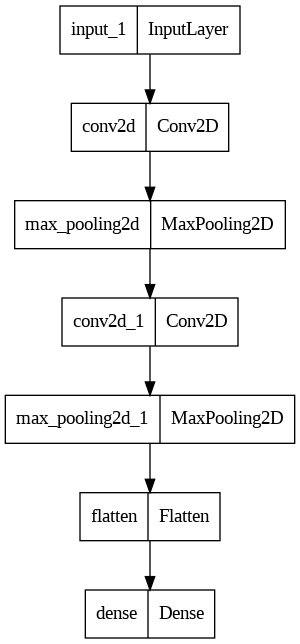

In [18]:
plot_model(model)

# Training the model

In [19]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 57s 120ms/step - loss: 1.0198 - accuracy: 0.8466
Epoch 2/10
469/469 [==============================] - 47s 100ms/step - loss: 0.1925 - accuracy: 0.9416
Epoch 3/10
469/469 [==============================] - 44s 94ms/step - loss: 0.1429 - accuracy: 0.9567
Epoch 4/10
469/469 [==============================] - 42s 90ms/step - loss: 0.1165 - accuracy: 0.9645
Epoch 5/10
469/469 [==============================] - 48s 102ms/step - loss: 0.1010 - accuracy: 0.9699
Epoch 6/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0896 - accuracy: 0.9726
Epoch 7/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0812 - accuracy: 0.9752
Epoch 8/10
469/469 [==============================] - 43s 91ms/step - loss: 0.0746 - accuracy: 0.9776
Epoch 9/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0697 - accuracy: 0.9789
Epoch 10/10
469/469 [==============================] - 42s 90ms/step - loss: 0.

# Inference on Test data

In [20]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test)

# Display test statistics
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0]*100, evaluation[1]*100))

313/313 [==============================] - 3s 8ms/step - loss: 2.2489 - accuracy: 0.9754
Summary: Loss over the test dataset: 224.89, Accuracy: 97.54


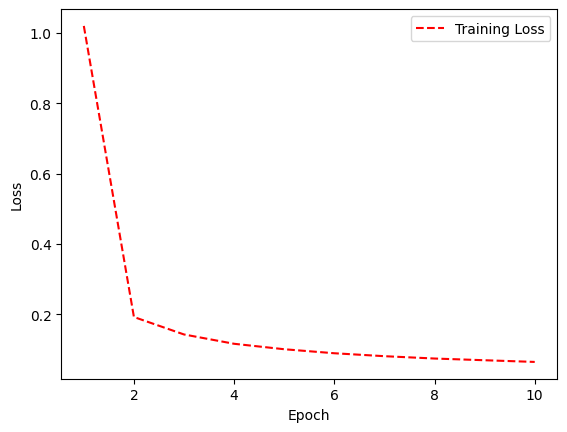

In [21]:
# Get training loss histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

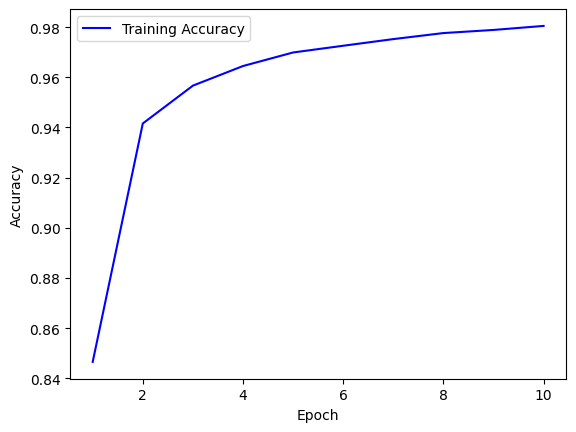

In [22]:
# Get training accuracy histories
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'b-')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();